In [1]:
fig_dir = "../../figures/"
fig_ext = "pdf"

In [2]:
from minke import sources

In [3]:
import matplotlib.pyplot as plt
#import thesis
%matplotlib inline

In [4]:
from gwpy.timeseries import TimeSeries

In [5]:

from matplotlib import rc, font_manager
from math import atan2,degrees
import numpy as np
from matplotlib import rc, font_manager
import matplotlib.patheffects as path_effects

colors = {"blue": "#348ABD",
          "red": "#E24A33",
          "purple": "#988ED5",
          "gray": "#777777",
          "yellow": "#FBC15E",
}

figwidth = 5 # 2.5
figheight = figwidth/1.616
figsize = (figwidth, figheight)


## FONTS

ssp_legend = {'family': 'Source Code Pro',
              'weight': 'normal',
              'size': 8,
}

lato = {'family': 'Lato',
        'color':  'black',
        'weight': 'light',
        'size': 10,
}
ssp_ticks = {'family': 'Source Code Pro',
             'weight': 'normal',
             'size': 6,
}

ticks_font = font_manager.FontProperties(**ssp_ticks)

def thesisify(f, height=1):
    # make the figure look the correct size
    f.set_figwidth(figwidth)
    f.set_figheight(height * figheight)
    # individual axis manipulations
    for ax in f.axes:
        for label in ax.get_xticklabels():
            label.set_fontproperties(ticks_font)
        ax.set_xlabel(ax.get_xlabel(), fontdict=lato)  
        ax.xaxis.get_offset_text().set_fontproperties(ticks_font)
        for label in ax.get_yticklabels():
            label.set_fontproperties(ticks_font)
        ax.set_ylabel(ax.get_ylabel(), fontdict=lato) 
        ax.yaxis.get_offset_text().set_fontproperties(ticks_font)
        
        if len(ax.get_ygridlines()) > 0:
            ax.grid(which="both", color='#348ABD', alpha=0.2, lw=0.3,)
        
    f.tight_layout()
    return f

In [7]:
source_list = [sources.Mueller2012(filepath="../../data/N20-2.dat", theta=0, time=100, phi=0),
               sources.Dimmelmeier08(filepath="../../data/signal_s15a2o09_ls.dat", time=100),
               sources.Scheidegger2010(filepath="../../data/R1E1CA_L.txt", time=100, theta=0, phi=0)
               #sources.BBHRingdown(time=100, phi0=0, mass=20, spin=0, massloss=4, distance=100, inclination=0)
          ]

TypeError: decompose() got an unexpected keyword argument 'distance'

40960


/home/daniel/.virtualenvs/IGRlaptop21/minke/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:1298: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/daniel/.virtualenvs/IGRlaptop21/minke/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:1303: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


4362
5419


/home/daniel/.virtualenvs/IGRlaptop21/minke/local/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:1121: UserWarning: 'SourceCodePro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


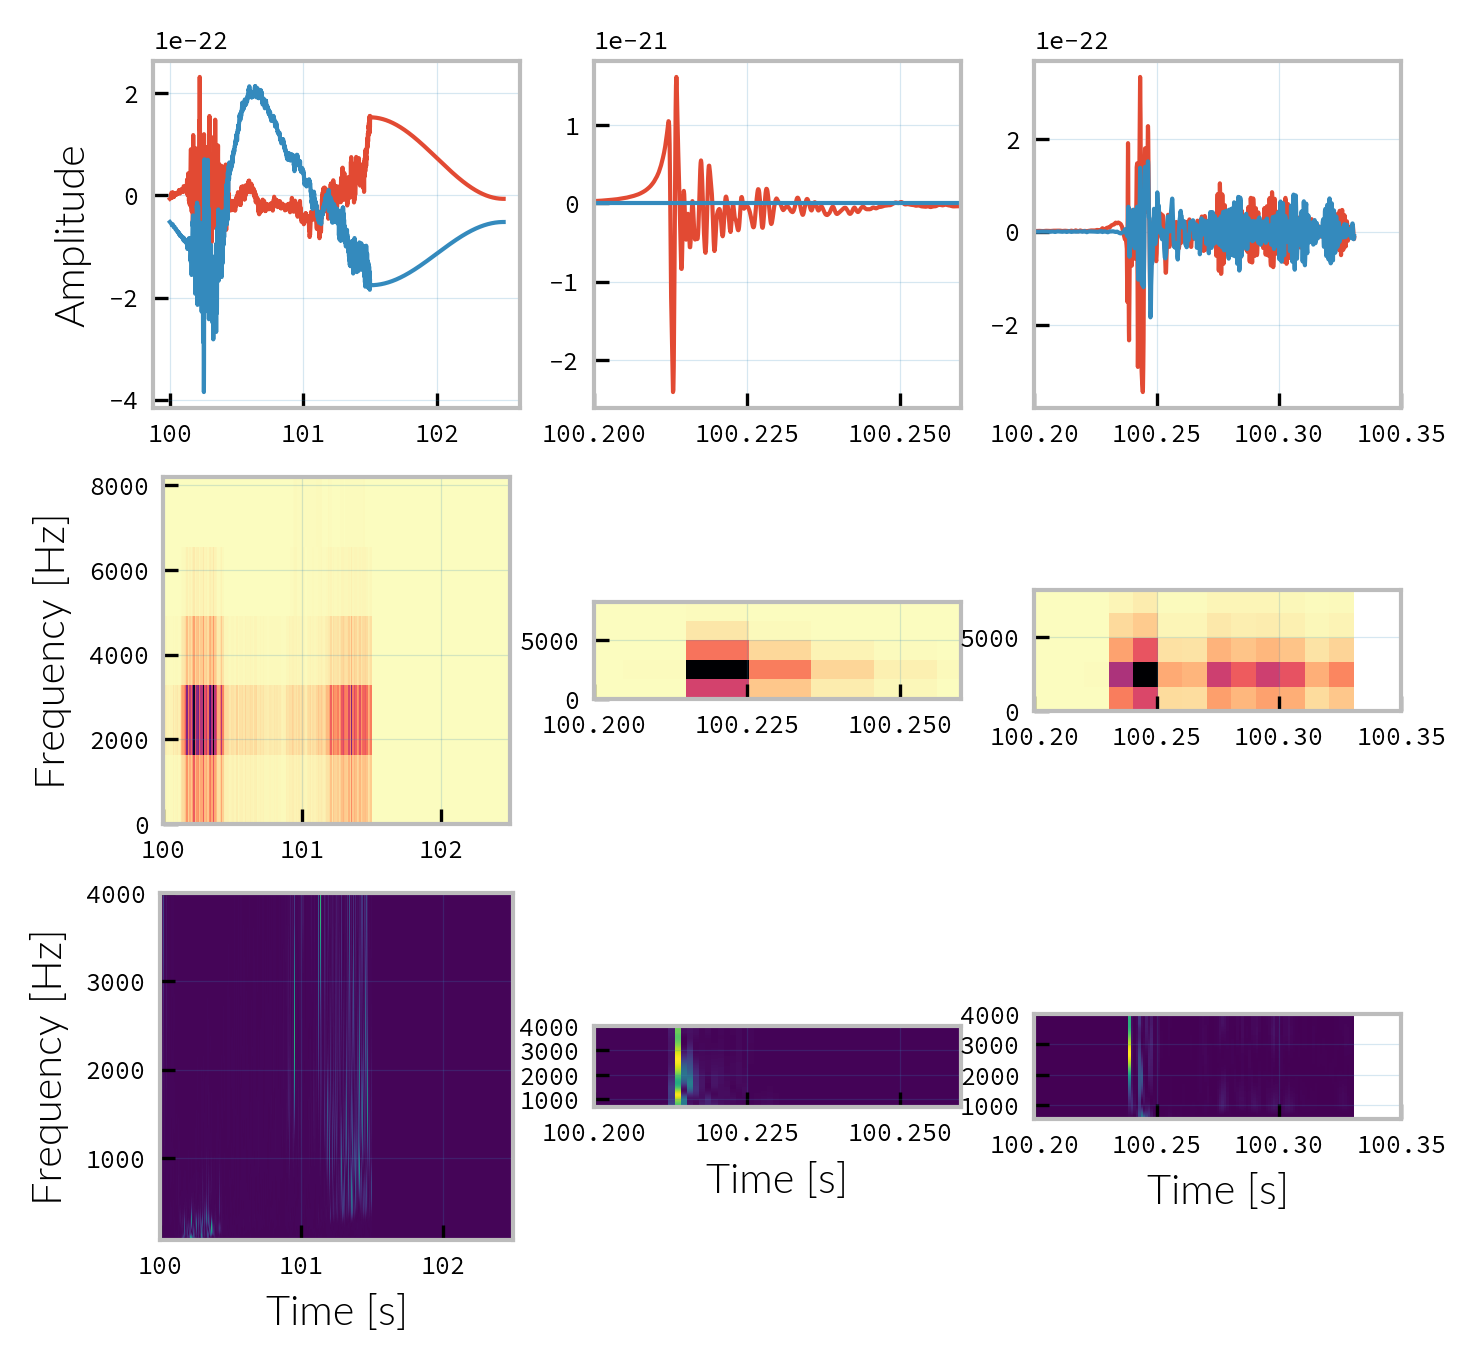

In [8]:
f, ax = plt.subplots(3,len(source_list), dpi=300)

ax[0,1].set_xlim([100.2, 100.26])
ax[1,1].set_xlim([100.2, 100.26])
ax[2,1].set_xlim([100.2, 100.26])

ax[0,2].set_xlim([100.2, 100.35])
ax[1,2].set_xlim([100.2, 100.35])
ax[2,2].set_xlim([100.2, 100.35])

for i, source in enumerate(source_list):
    data = source._generate()
    print(len(data[0].data.data))
    data_gw_p = TimeSeries(data = data[0].data.data, t0=data[0].epoch, dt = data[0].deltaT)
    data_gw_c = TimeSeries(data = data[1].data.data, t0=data[1].epoch, dt = data[1].deltaT)
    ax[0,i].plot(data_gw_p.times.value, data_gw_p.value, lw=1)
    ax[0,i].plot(data_gw_c.times.value, data_gw_c.value, lw=1)
    
    specgram = data_gw_p.spectrogram(0.01, fftlength=0.0005, overlap=0.00025)** (1/2.)
    axrat = ((ax[1,i].get_xlim()[1]-ax[1,i].get_xlim()[0])/(ax[1,i].get_ylim()[1]-ax[1,i].get_ylim()[0]))
    ax[1,i].imshow(specgram.value.T,
            #np.log(specgram.value.T), 
                   aspect=axrat * (data_gw_p.times.value[-1] - data_gw_p.times.value[0]) / specgram.frequencies.value[-1], 
                   origin="lower", 
                   cmap = "magma_r",
                   extent=(data_gw_p.times.value[0], data_gw_p.times.value[-1], specgram.frequencies.value[0], specgram.frequencies.value[-1]))
    
    qt = data_gw_p.q_transform(whiten=False, qrange=[4,32], frange=[0,4000])
    ax[2,i].imshow(qt.value.T, origin='lower', 
                   cmap="viridis",
           aspect=axrat * (data_gw_p.times.value[-1] - data_gw_p.times.value[0]) / qt.frequencies.value[-1], 
           extent=(data_gw_p.times.value[0], data_gw_p.times.value[-1], qt.frequencies.value[0], qt.frequencies.value[-1])
    )
    #if i<3: ax[0,i].set_ylim([-1.2e-20, 1.2e-20])
    #if i<3: ax[0,i].set_xlim([99.95, 100.05])
    
    ax[2,i].set_xlabel("Time [s]")


    
ax[2,0].set_ylabel("Frequency [Hz]")
ax[1,0].set_ylabel("Frequency [Hz]")
ax[0,0].set_ylabel("Amplitude")
    
        
thesisify(f, height=1.5);
f.subplots_adjust(wspace=0.2, hspace=0.2)



f.savefig("{}/sources/minke-supernova.{}".format(fig_dir, fig_ext))
